# Two Layer Neural Network

### In this notebook, I implemented a simple two-layer neural network and trained it on the MNIST digit recognizer dataset.

### *This NN will have a simple two-layer architecture. Input layer  a[0] will have 784 units corresponding to the 784 pixels in each 28x28 input image.*

In [15]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv('/Users/daksh/Desktop/reps/MNIST NN/data/train.csv')

In [16]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [17]:
Y_train

array([5, 4, 4, ..., 0, 3, 7])

### *A hidden layer  a[1] will have 10 units with ReLU activation, and finally our output layer  a[2] will have 10 units corresponding to the ten digit classes with softmax activation.*

In [18]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2


In [19]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [20]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[3 3 6 ... 3 6 3] [5 4 4 ... 0 3 7]
0.052317073170731705
Iteration:  10
[3 3 6 ... 0 6 4] [5 4 4 ... 0 3 7]
0.2272439024390244
Iteration:  20
[9 4 6 ... 0 6 2] [5 4 4 ... 0 3 7]
0.30190243902439023
Iteration:  30
[9 4 6 ... 0 7 3] [5 4 4 ... 0 3 7]
0.3635609756097561
Iteration:  40
[9 4 5 ... 0 7 7] [5 4 4 ... 0 3 7]
0.4262439024390244
Iteration:  50
[9 4 8 ... 0 7 7] [5 4 4 ... 0 3 7]
0.47485365853658534
Iteration:  60
[9 4 8 ... 0 7 7] [5 4 4 ... 0 3 7]
0.5149024390243903
Iteration:  70
[9 4 8 ... 0 7 7] [5 4 4 ... 0 3 7]
0.5537073170731708
Iteration:  80
[9 4 4 ... 0 7 7] [5 4 4 ... 0 3 7]
0.5895365853658536
Iteration:  90
[5 4 4 ... 0 7 7] [5 4 4 ... 0 3 7]
0.6184878048780488
Iteration:  100
[5 4 4 ... 0 7 7] [5 4 4 ... 0 3 7]
0.6448536585365854
Iteration:  110
[5 4 4 ... 0 7 7] [5 4 4 ... 0 3 7]
0.6661463414634147
Iteration:  120
[5 4 4 ... 0 3 7] [5 4 4 ... 0 3 7]
0.6845365853658537
Iteration:  130
[5 4 4 ... 0 3 7] [5 4 4 ... 0 3 7]
0.7011463414634146
Iteration:  1

### *~85% accuracy on training set.*

In [21]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

### *Using MNIST Handwritten Digits Dataset to train the model.*

Prediction:  [5]
Label:  5


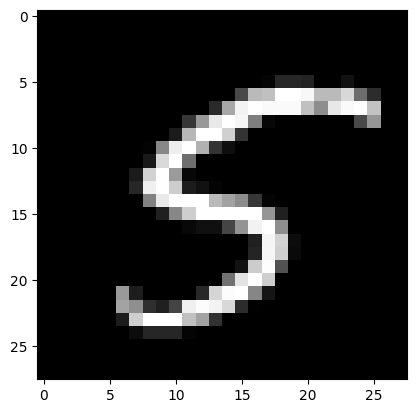

Prediction:  [4]
Label:  4


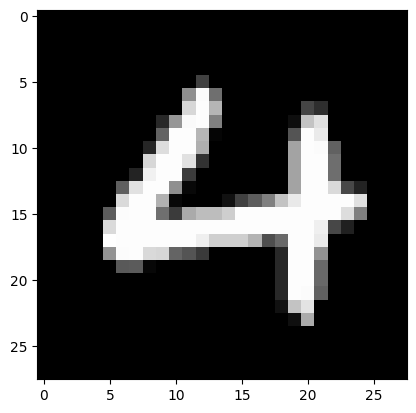

Prediction:  [4]
Label:  4


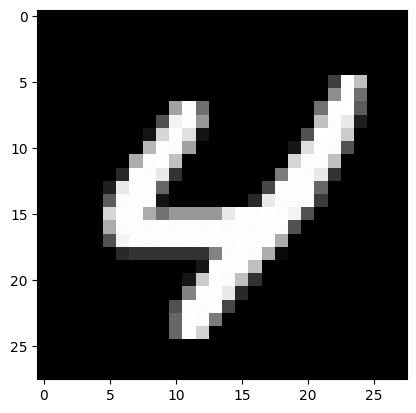

Prediction:  [0]
Label:  8


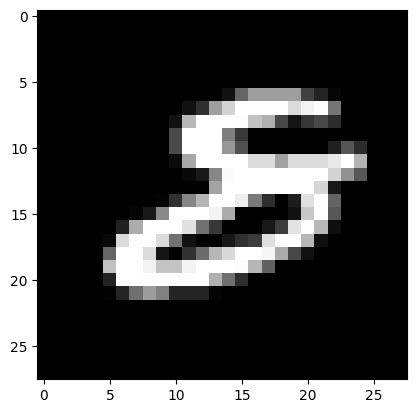

In [22]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [23]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[9 6 1 9 0 2 3 6 3 4 6 2 0 2 9 7 2 8 1 9 4 6 3 1 3 8 9 1 0 0 3 4 4 6 0 2 4
 7 0 6 1 0 6 6 3 3 8 2 1 3 4 7 9 2 7 2 9 3 9 6 2 8 7 6 0 0 3 5 1 6 8 7 7 6
 4 4 9 7 0 1 3 9 0 7 8 2 1 7 6 6 2 1 7 5 8 1 3 1 6 5 2 7 5 2 1 7 2 3 2 4 3
 3 3 1 0 2 7 2 2 5 4 6 1 4 4 2 3 5 4 2 5 4 4 4 1 7 3 2 2 7 2 3 1 9 7 3 5 3
 3 3 4 5 5 6 9 1 6 9 2 6 7 5 6 3 0 7 1 2 3 8 8 6 7 1 2 5 1 0 9 5 4 8 6 2 9
 2 6 3 9 0 8 4 0 6 1 5 7 5 8 1 5 6 4 4 2 3 7 3 1 8 5 3 8 1 8 1 2 1 3 8 5 2
 3 5 3 3 3 6 9 4 0 5 1 7 6 7 9 7 1 6 0 2 9 0 0 6 4 2 1 1 0 3 8 4 7 5 9 3 4
 3 3 6 6 8 7 7 3 3 2 1 7 7 3 9 3 6 4 0 3 1 3 6 3 9 3 0 4 6 2 7 7 1 6 7 7 8
 9 9 2 6 3 3 1 6 7 1 7 0 1 6 9 7 5 7 8 7 6 0 3 2 2 2 8 7 5 3 3 8 2 7 9 8 2
 9 2 3 8 7 4 8 9 5 9 5 9 1 8 0 7 9 7 2 1 0 4 8 4 5 8 0 3 1 8 2 7 2 9 6 2 8
 8 4 1 3 0 8 3 8 1 5 4 0 7 1 5 2 7 7 9 8 1 8 6 6 7 3 9 7 5 4 2 2 3 3 6 6 6
 9 5 3 6 7 6 1 4 4 8 2 3 5 1 6 4 1 4 7 9 8 9 8 4 7 9 9 3 4 6 9 8 0 7 3 9 2
 4 1 5 8 1 4 3 9 2 9 2 1 4 5 8 9 8 1 9 7 9 1 3 7 1 0 0 1 7 3 5 0 3 3 2 3 8
 3 8 4 1 9 4 8 9 5 9 2 3 

np.float64(0.85)

## *~85% Accuracy for the MNIST 2 Layer Neural Network Model*